In [5]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style='whitegrid')

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv('heart.csv')

In [11]:
df.shape

(303, 14)

In [13]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [21]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

#### Important points about dataset <a class="anchor" id="6.6"></a>


- `sex` is a character variable. Its data type should be object. But it is encoded as (1 = male; 0 = female). So, its data type is given as int64.

- Same is the case with several other variables - `fbs`, `exang` and `target`.

- `fbs (fasting blood sugar)` should be a character variable as it contains only 0 and 1 as values (1 = true; 0 = false). As it contains only 0 and 1 as values, so its data type is given as int64.

- `exang (exercise induced angina)` should also be a character variable as it contains only 0 and 1 as values (1 = yes; 0 = no). It also contains only 0 and 1 as values, so its data type is given as int64.

- `target` should also be a character variable. But, it also contains 0 and 1 as values. So, its data type is given as int64.


#### Statistical properties of dataset

In [25]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [29]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

#### Univariate analysis

#### Check the number of unique values in `target` variable

In [35]:
df['target'].nunique()

2

In [37]:
df['target'].unique()

array([1, 0], dtype=int64)

So, the unique values are 1 and 0. (1 stands for presence of heart disease and 0 for absence of hear disease).

In [40]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

165 are suffering from heat disese
138 are ppl who doesn't have heart disease

#### Visualize frequency distribution of `target` variable

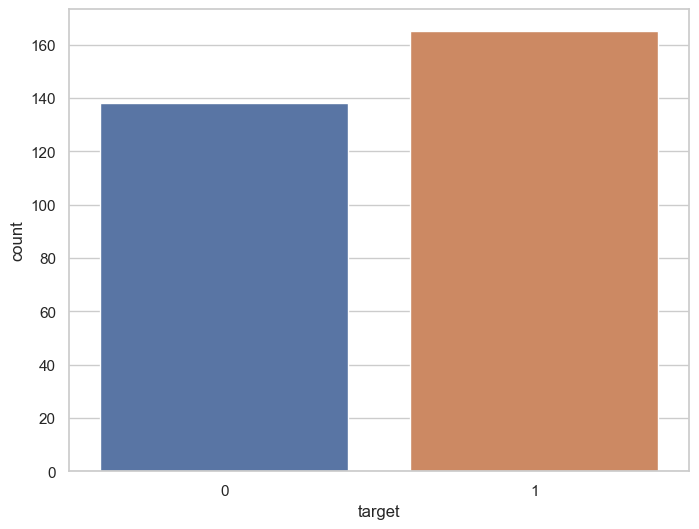

In [54]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='target',data=df,palette='deep')
plt.show()

#### Frequency distribution of `target` variable wrt `sex`

In [57]:
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: count, dtype: int64

We can visualize the value counts of the `sex` variable wrt `target` as follows -

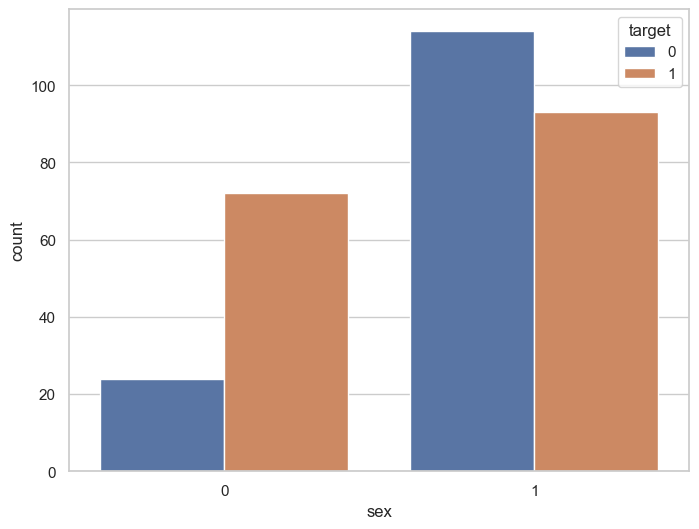

In [64]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='sex',hue='target',data=df)

plt.show()

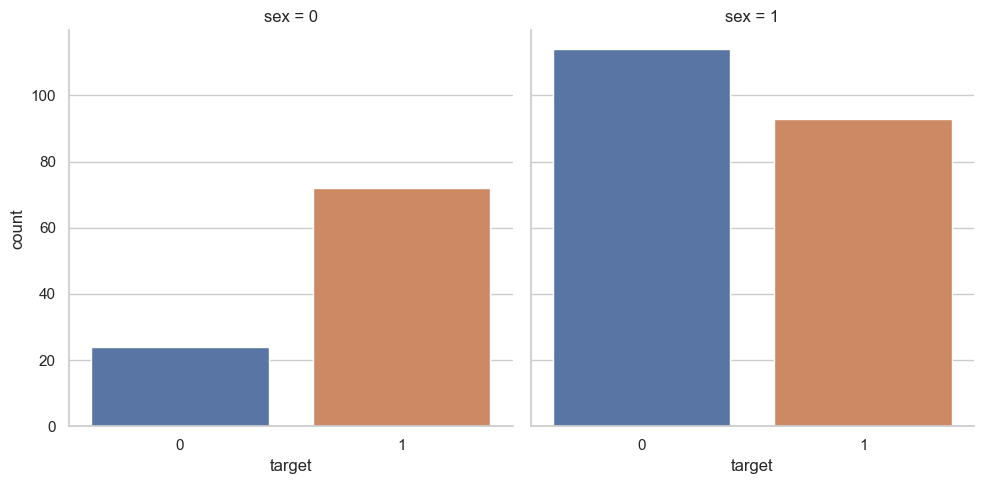

In [68]:
ax=sns.catplot(x='target',col='sex',data=df,kind='count',height=5,aspect=1,palette='deep')

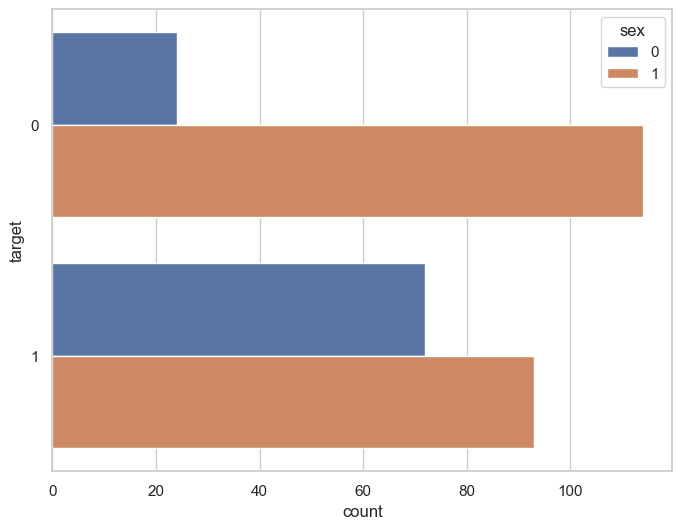

In [70]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(y="target", hue="sex", data=df)
plt.show()

We can use a different color palette as follows :

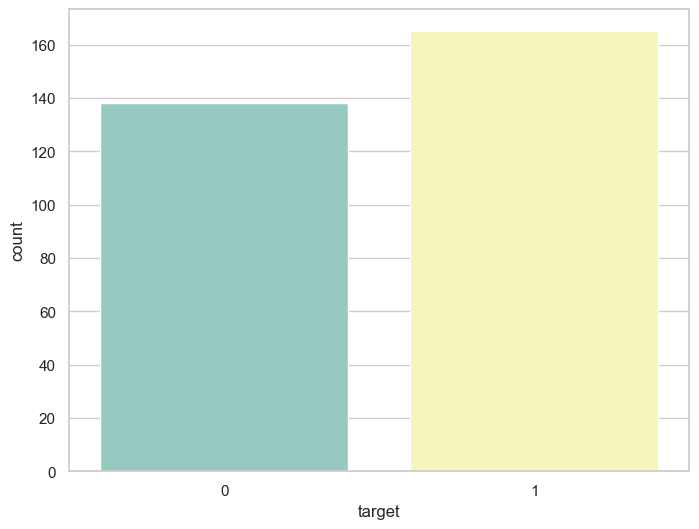

In [73]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", data=df, palette="Set3")
plt.show()

We can use `plt.bar` keyword arguments for a different look :

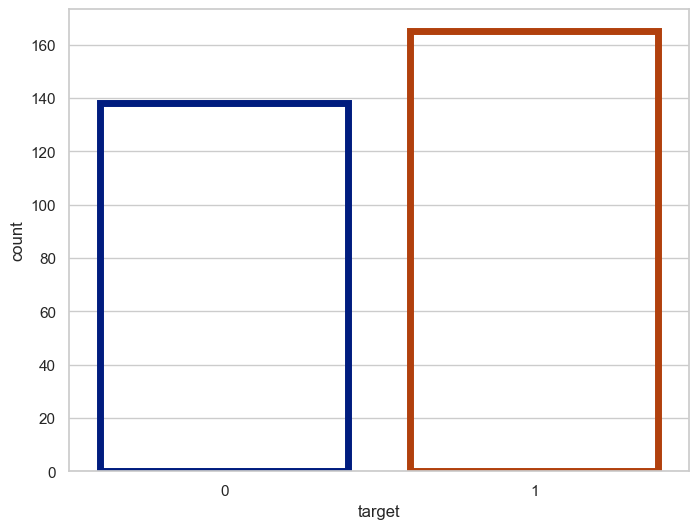

In [78]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", data=df, facecolor=(0, 0, 0, 0), linewidth=5, edgecolor=sns.color_palette("dark", 3))
plt.show()

#### Comment


- I have visualize the `target` values distribution wrt `sex`. 

- We can follow the same principles and visualize the `target` values distribution wrt `fbs (fasting blood sugar)` and `exang (exercise induced angina)`.

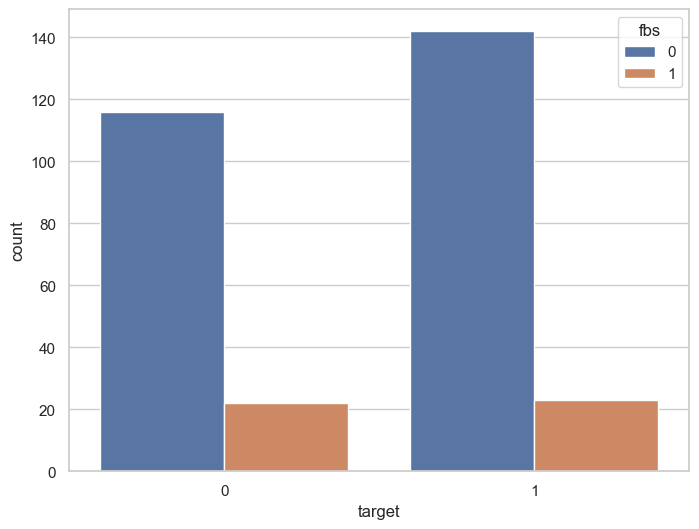

In [81]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='target',hue='fbs',data=df)

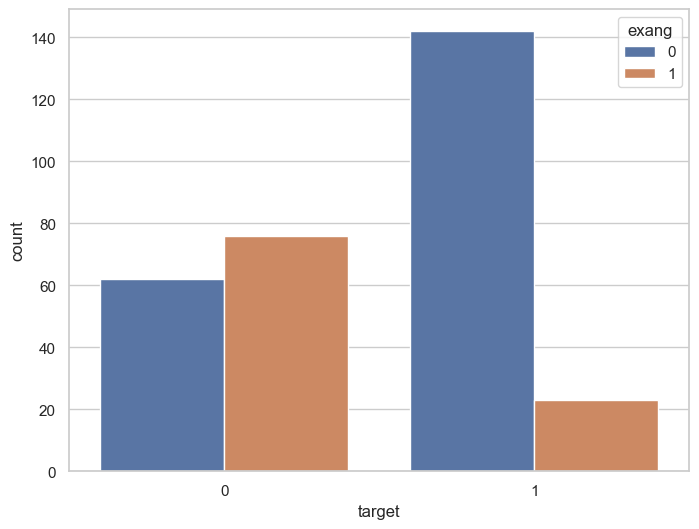

In [85]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='target',hue='exang',data=df)
plt.show()

### Bivariate Analysis 

In [88]:
correlation=df.corr()

The target variable is `target`. So, we should check how each attribute correlates with the `target` variable. We can do it as follows:-

In [91]:
correlation['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

### Analysis of `target` and `cp` variable

In [99]:
df['cp'].nunique()

4

In [101]:
df['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [103]:
df['cp'].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

#### Visualize the frequency distribution of `cp` variable


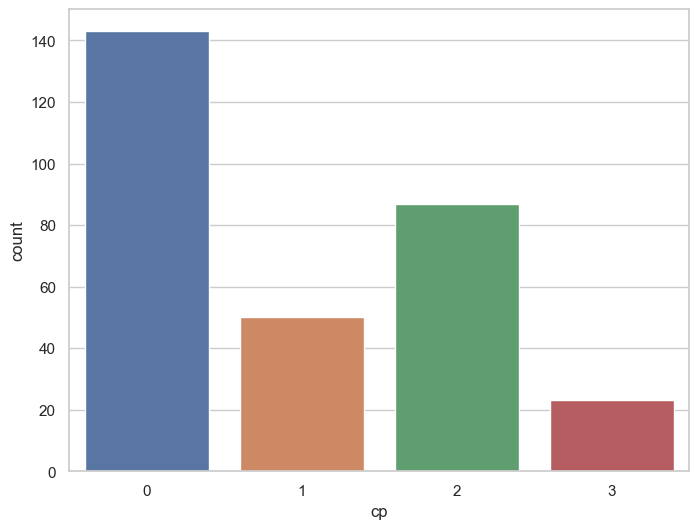

In [108]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='cp',data=df,palette='deep')
plt.show()

#### Frequency distribution of `target` variable wrt `cp`

In [111]:
df.groupby('cp')['target'].value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          69
    0          18
3   1          16
    0           7
Name: count, dtype: int64

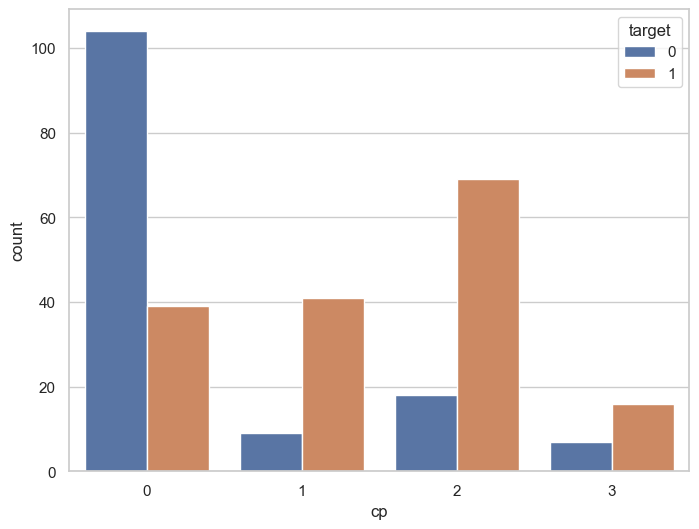

In [113]:
f,ax=plt.subplots(figsize=(8,6))
ax=sns.countplot(x='cp',hue='target',data=df,palette='deep')
plt.show()

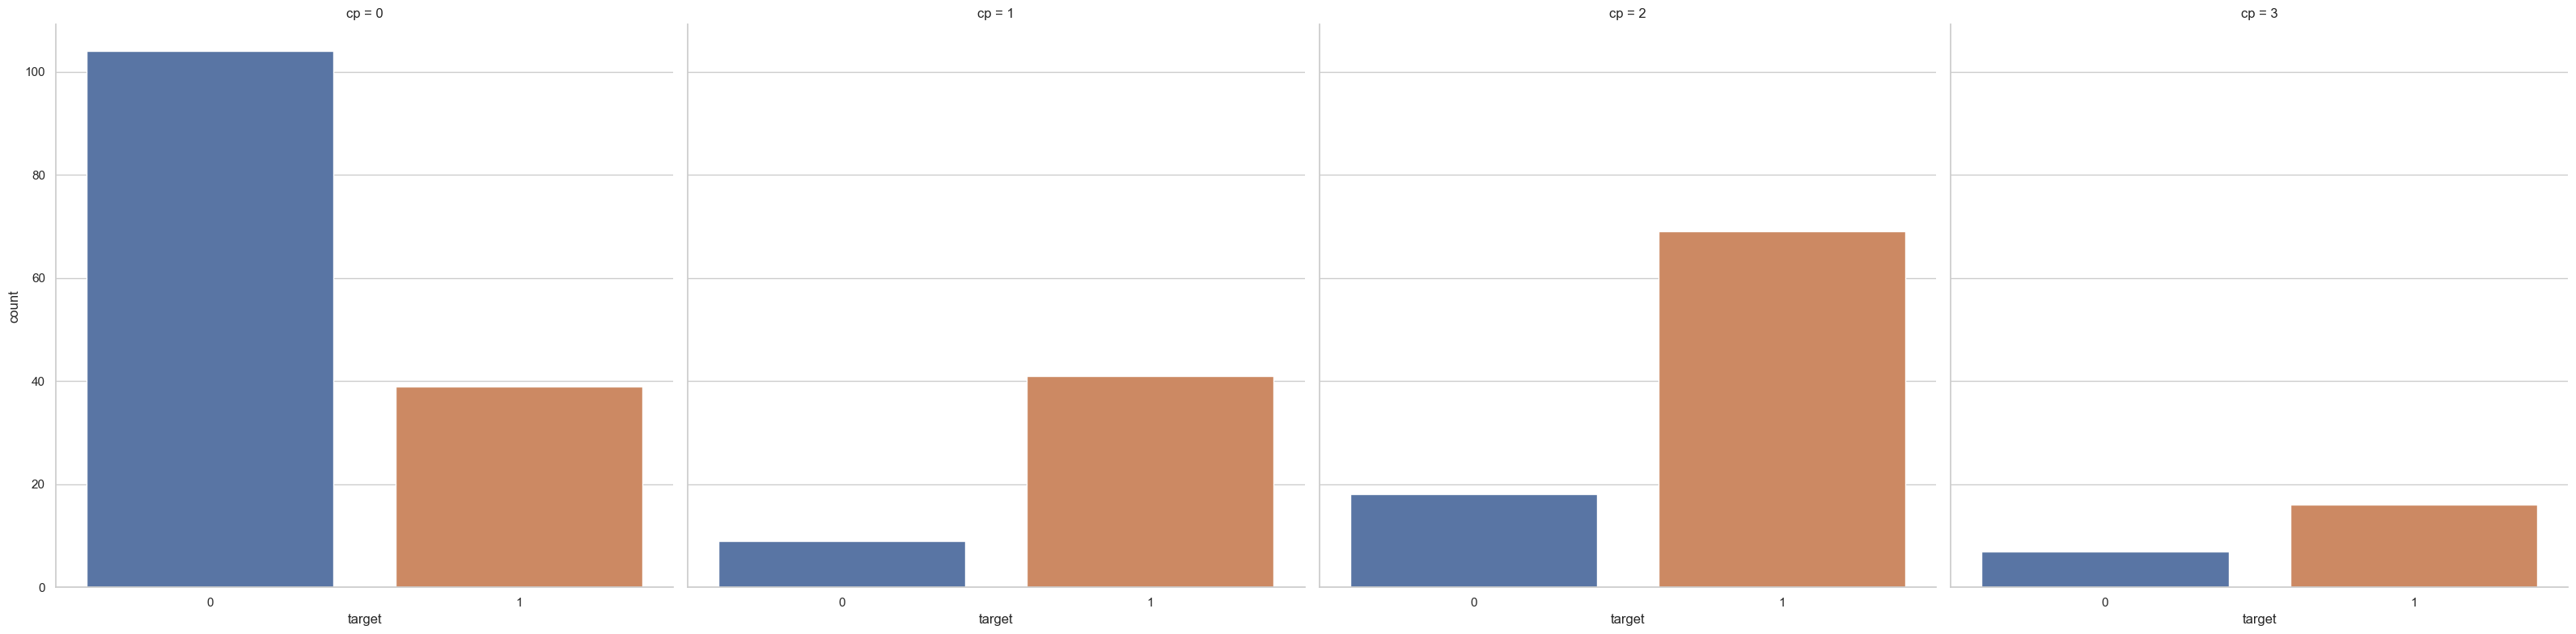

In [117]:
ax=sns.catplot(x='target',col='cp',data=df,kind='count',height=8,aspect=1,palette='deep')

### Analysis of `target` and `thalach` variable

In [128]:
df['thalach'].nunique()

91

In [130]:
df['thalach'].unique()

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

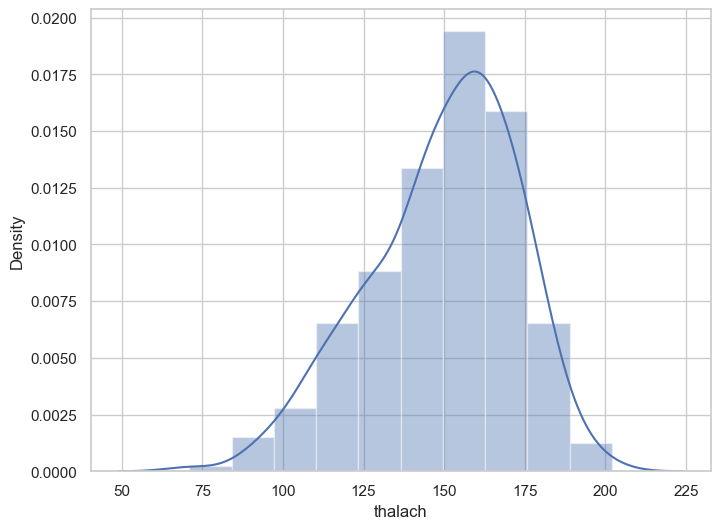

In [132]:
f,ax=plt.subplots(figsize=(8,6))
x=df['thalach']
ax=sns.distplot(x,bins=10)
plt.show()

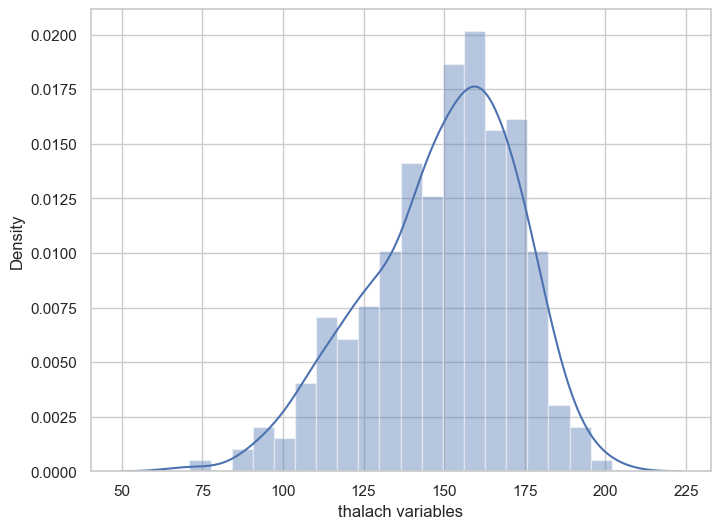

In [134]:
f,ax=plt.subplots(figsize=(8,6))
x=df['thalach']
x=pd.Series(x,name='thalach variables')
ax=sns.distplot(x,bins=20)
plt.show()

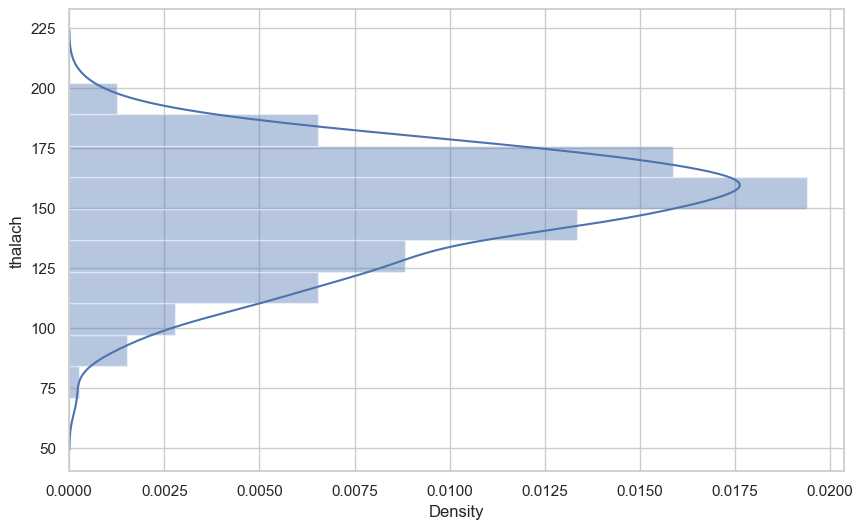

In [136]:
f, ax = plt.subplots(figsize=(10,6))
x = df['thalach']
ax = sns.distplot(x, bins=10, vertical=True)
plt.show()

#### Seaborn Kernel Density Estimation (KDE) Plot


- The kernel density estimate (KDE) plot is a useful tool for plotting the shape of a distribution.

- The KDE plot plots the density of observations on one axis with height along the other axis.

- We can plot a KDE plot as follows :

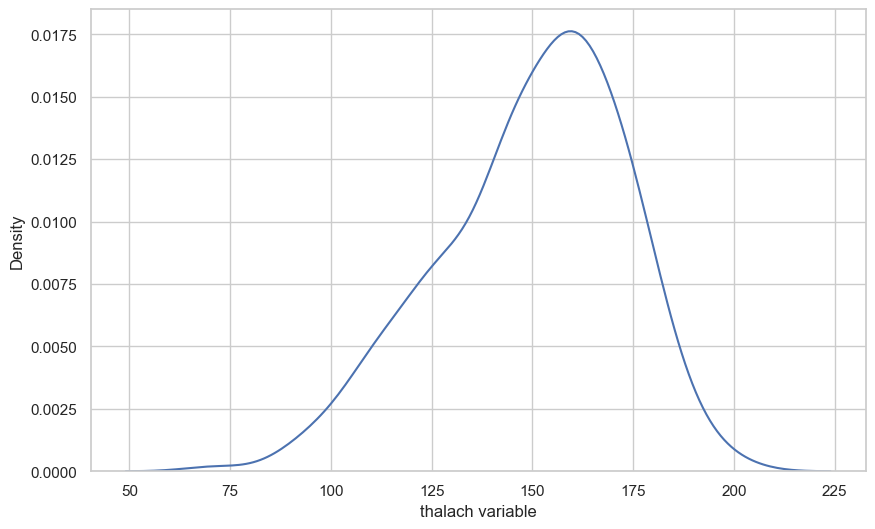

In [139]:
f, ax = plt.subplots(figsize=(10,6))
x = df['thalach']
x = pd.Series(x, name="thalach variable")
ax = sns.kdeplot(x)
plt.show()

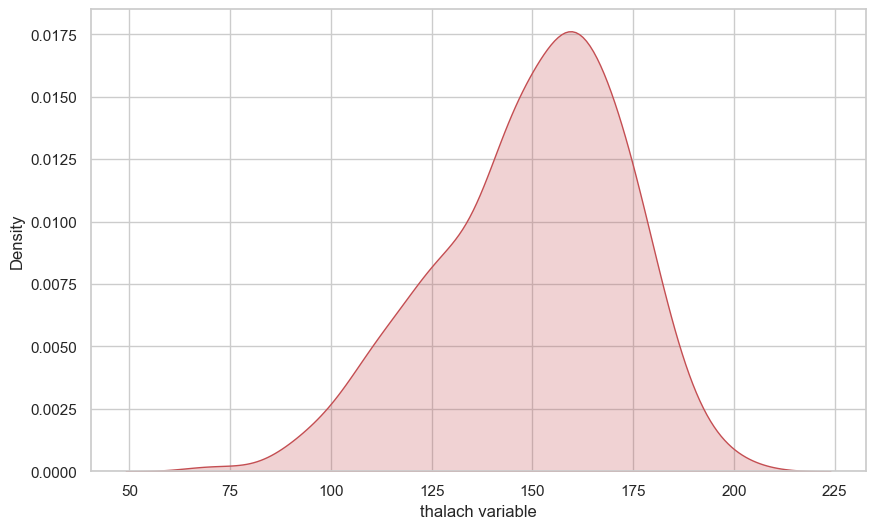

In [143]:
f, ax = plt.subplots(figsize=(10,6))
x = df['thalach']
x = pd.Series(x, name="thalach variable")
ax = sns.kdeplot(x,shade=True,color='r')
plt.show()

#### Histogram

- A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

- We can plot a histogram as follows :

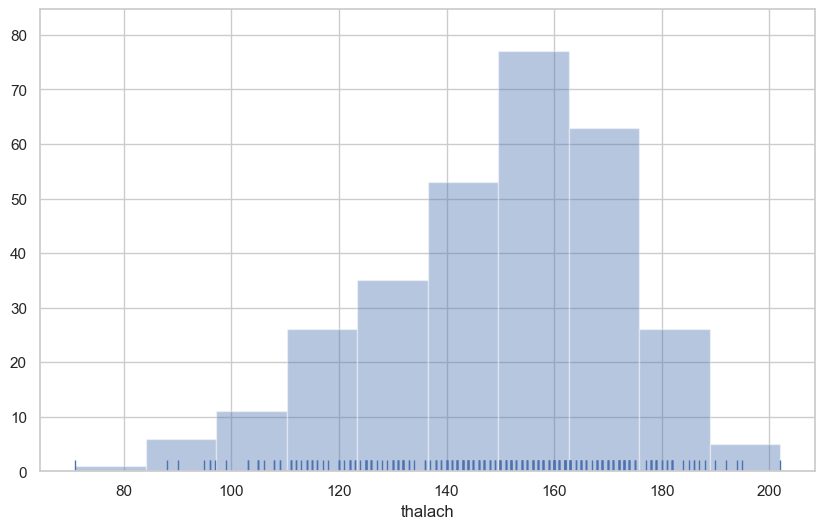

In [146]:
f, ax = plt.subplots(figsize=(10,6))
x = df['thalach']
ax = sns.distplot(x, kde=False, rug=True, bins=10)
plt.show()

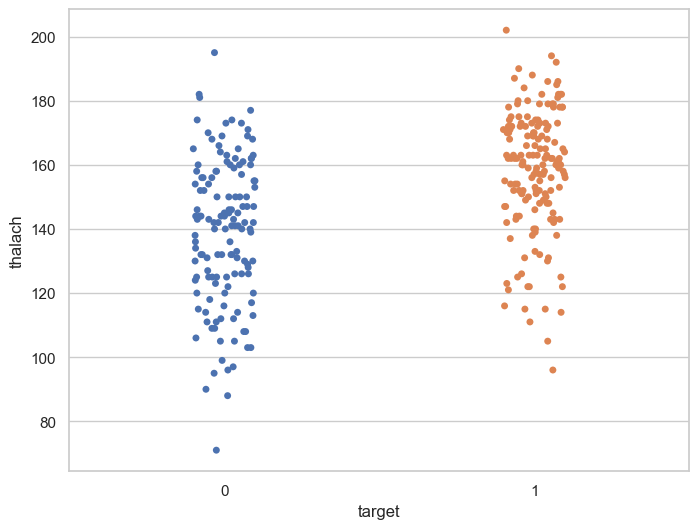

In [150]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="target", y="thalach", data=df,palette='deep')
plt.show()

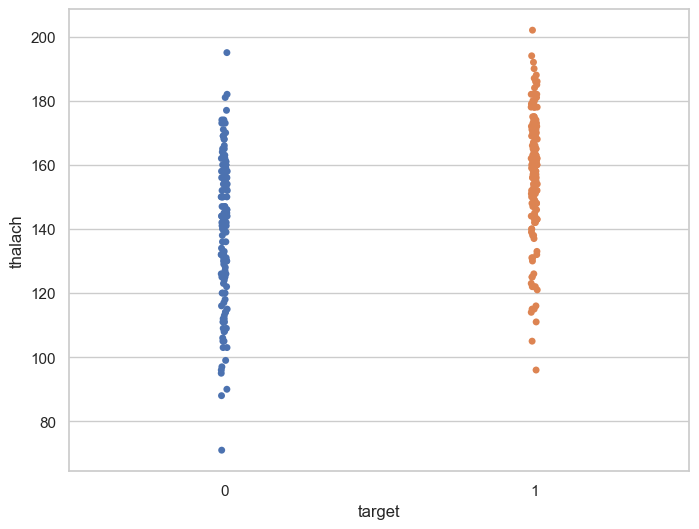

In [154]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="target", y="thalach", data=df, jitter = 0.01,palette='deep')
plt.show()

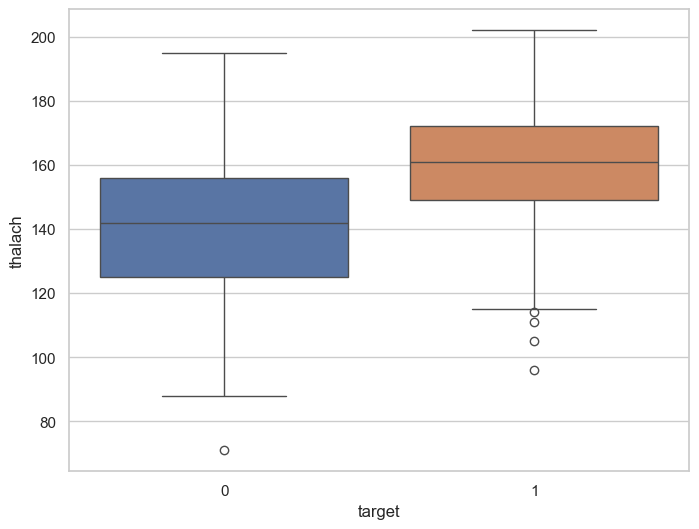

In [158]:
f,ax=plt.subplots(figsize=(8,6))
sns.boxplot(x='target',y='thalach',data=df,palette='deep')
plt.show()

###  Multivariate analysis 

### Discover patterns and relationships

- An important step in EDA is to discover patterns and relationships between variables in the dataset. 

- I will use `heat map` and `pair plot` to discover the patterns and relationships in the dataset.

- First of all, I will draw a `heat map`.

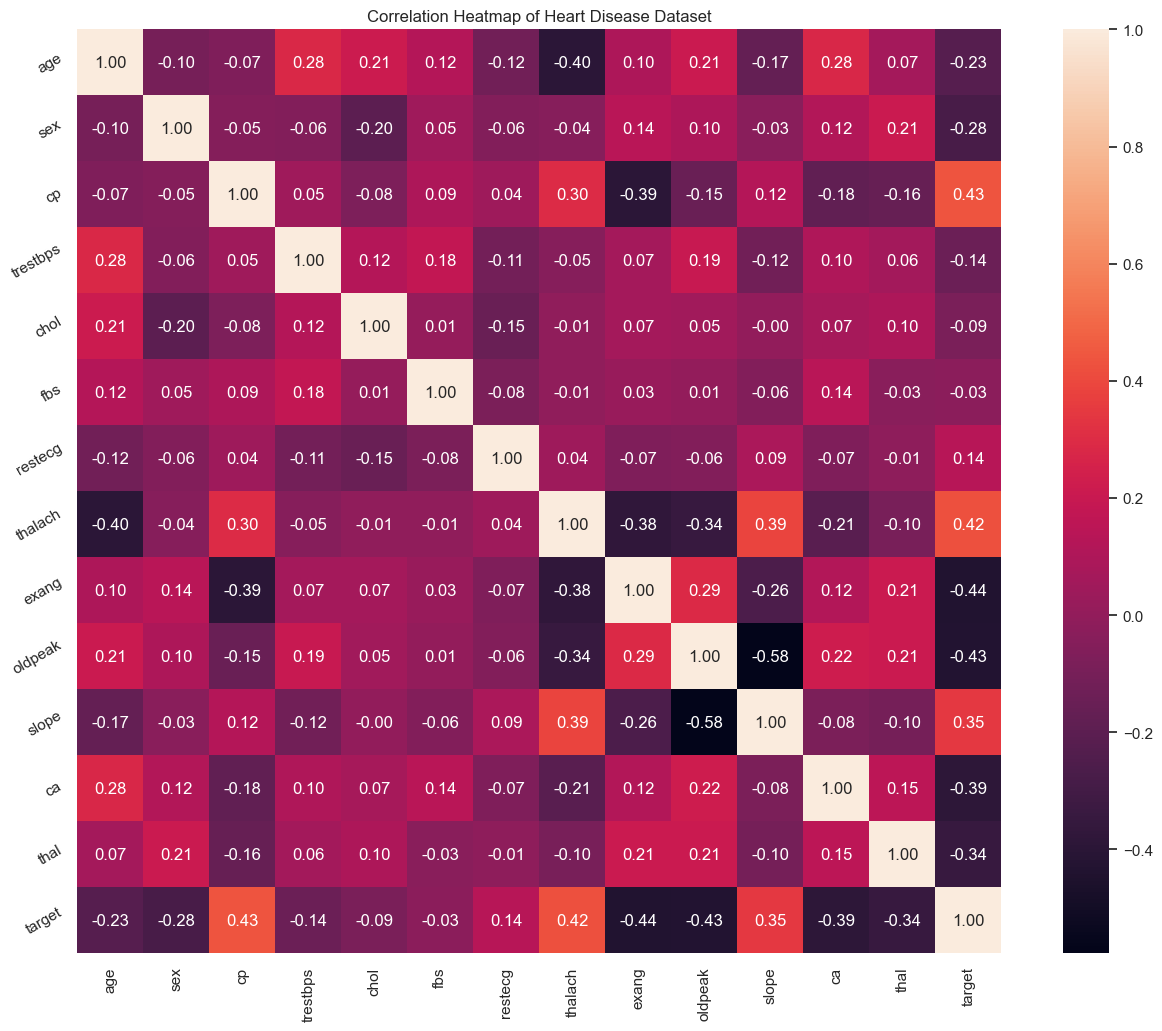

In [166]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Heart Disease Dataset')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

### Pair plot

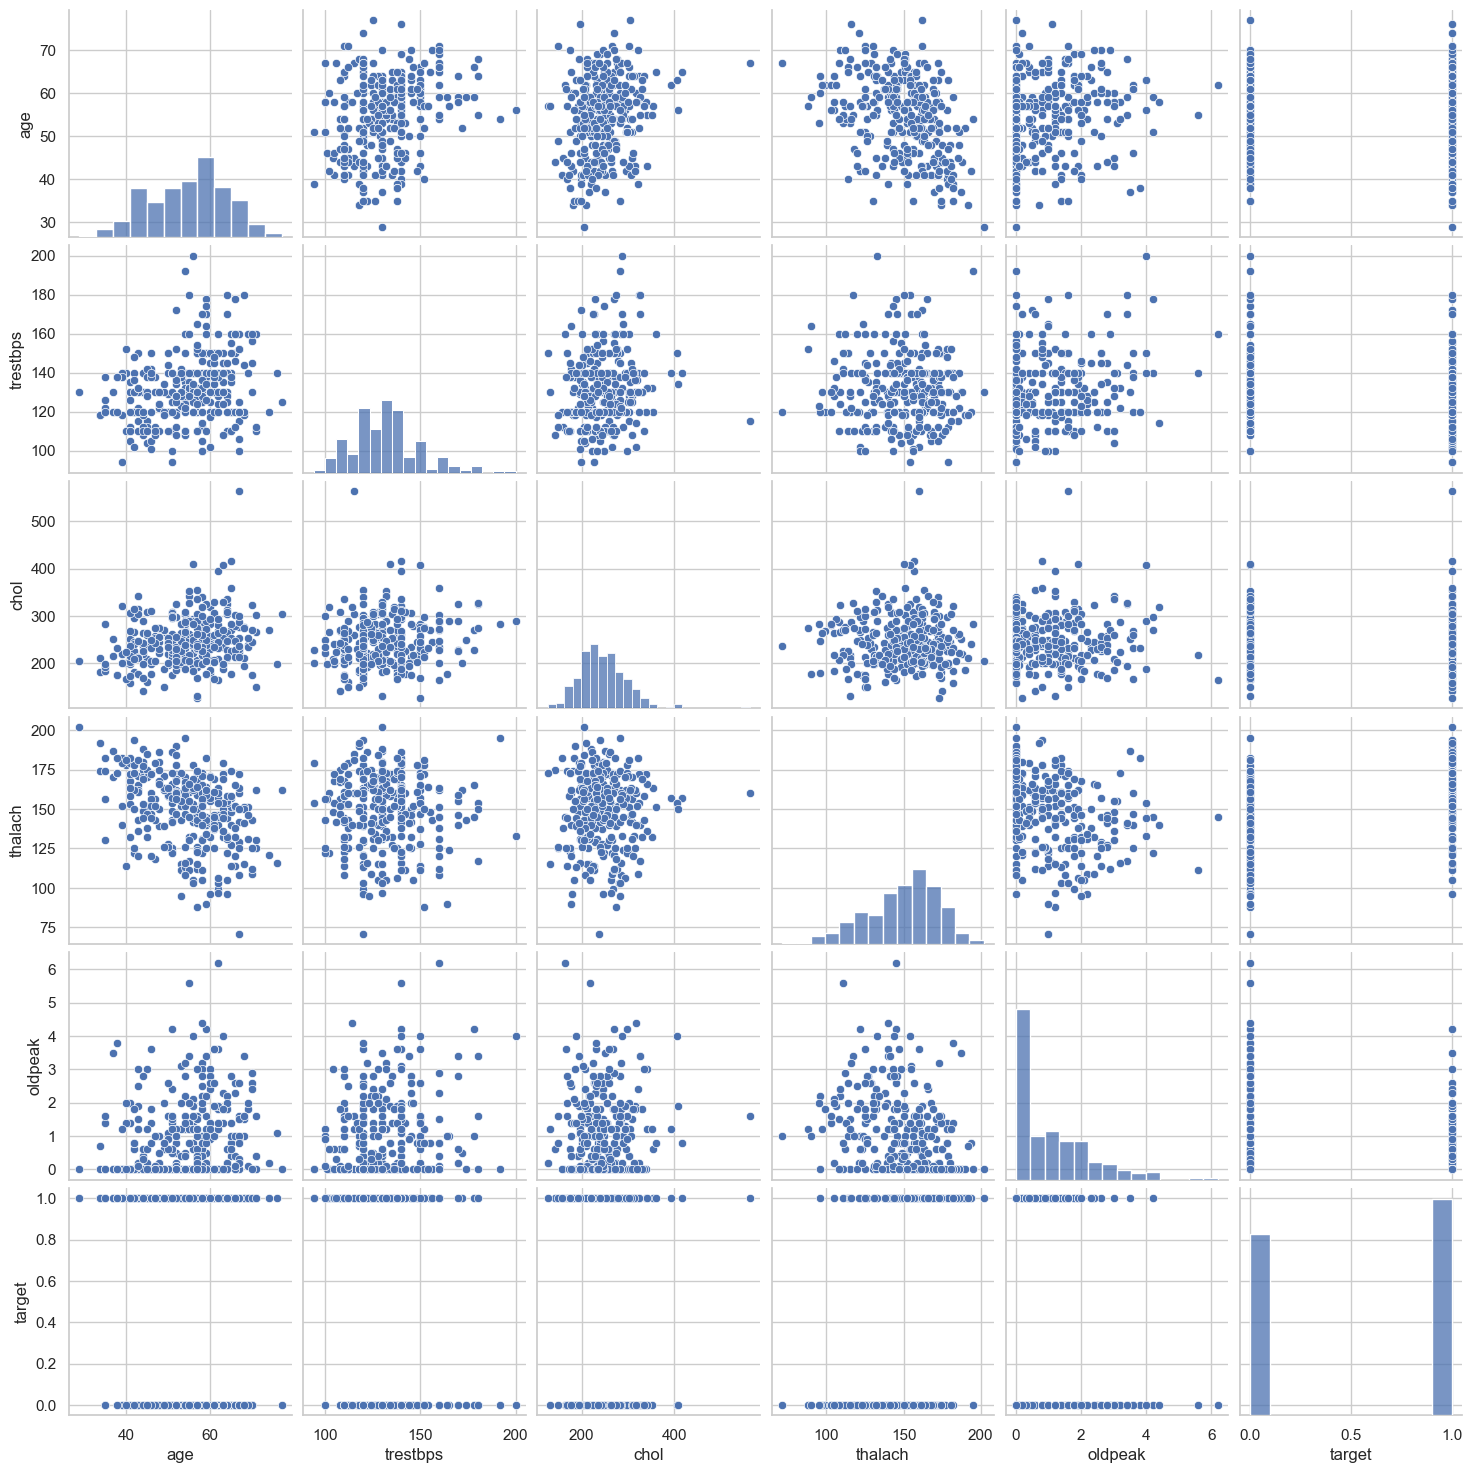

In [175]:
num_var=['age','trestbps','chol','thalach','oldpeak','target']
sns.pairplot(df[num_var],kind='scatter',diag_kind='hist')
plt.show()

### Analysis of `age` and other variables

In [178]:
df['age'].nunique()

41

In [180]:
df['age'].unique()

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

In [182]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

#### Plot the distribution of `age` variable

Now, I will plot the distribution of `age` variable to view the statistical properties.

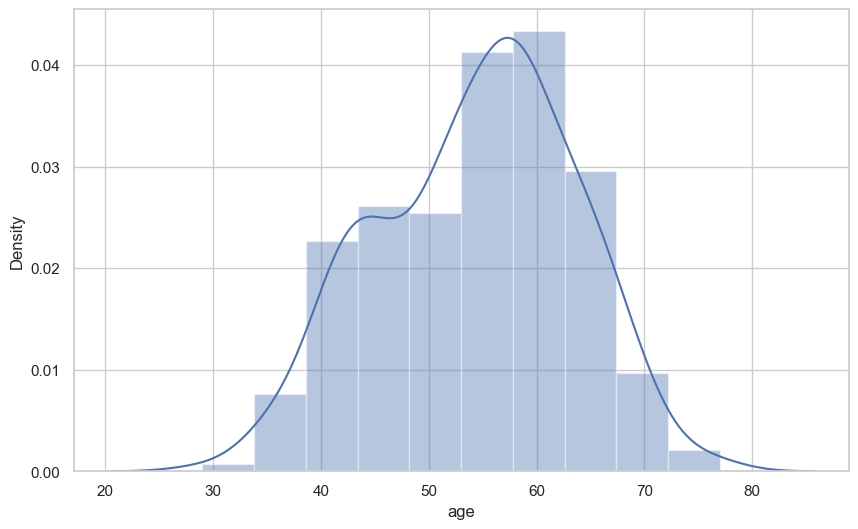

In [184]:
f, ax = plt.subplots(figsize=(10,6))
x = df['age']
ax = sns.distplot(x, bins=10)
plt.show()

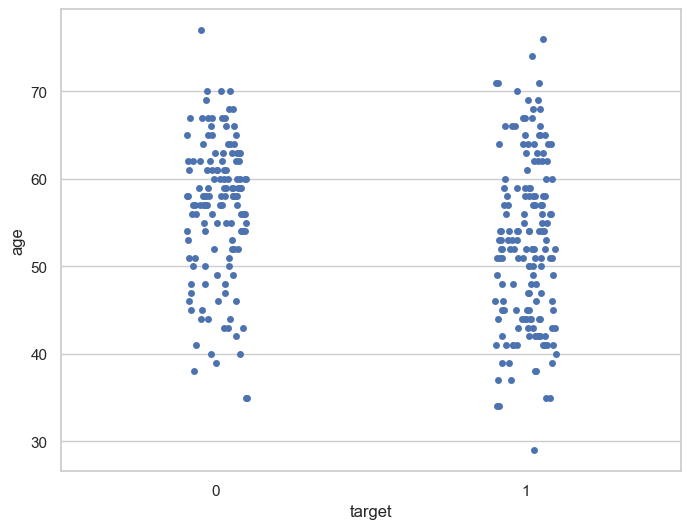

In [187]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="target", y="age", data=df)
plt.show()

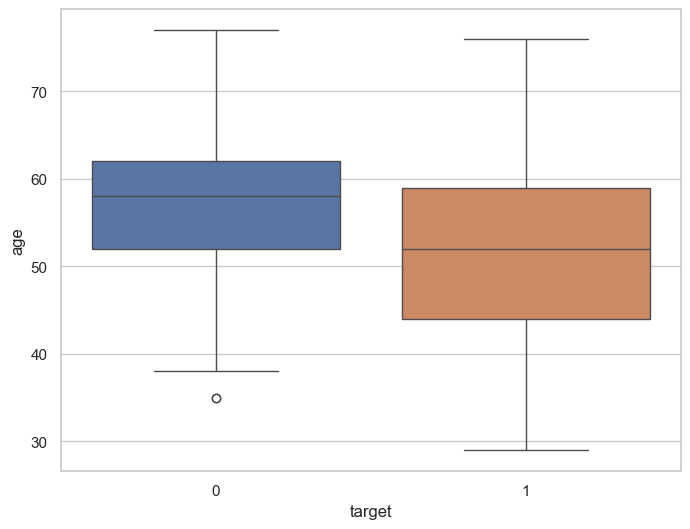

In [193]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="age", data=df,palette='deep')
plt.show()

### Analyze `age` and `trestbps` variable



I will plot a scatterplot to visualize the relationship between `age` and `trestbps` variable.

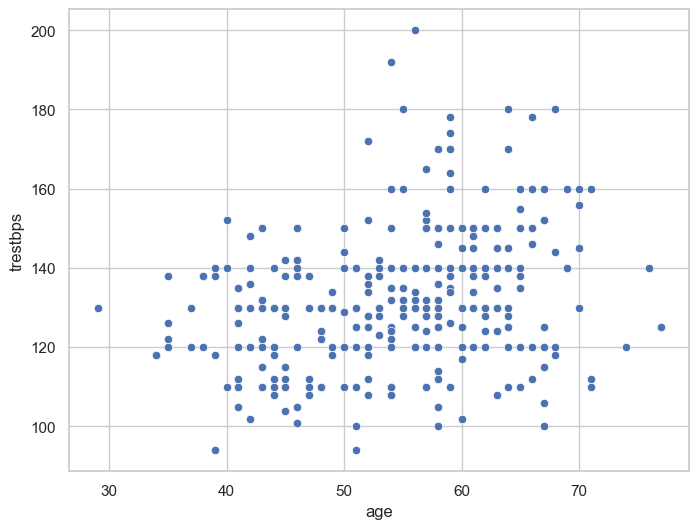

In [198]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(x="age", y="trestbps", data=df)
plt.show()


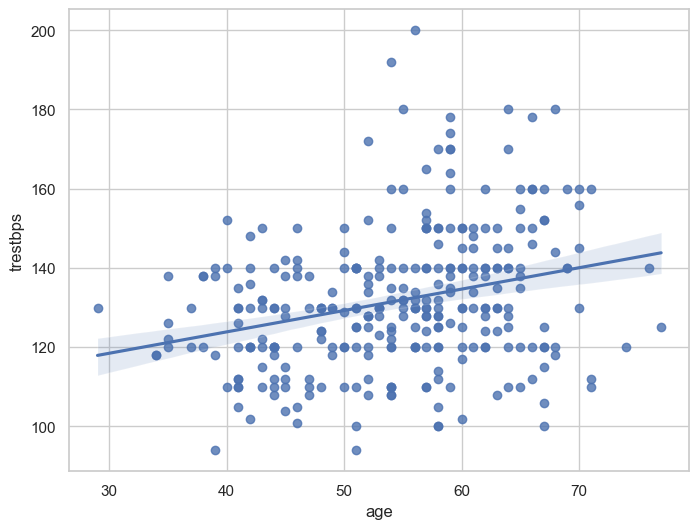

In [200]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="age", y="trestbps", data=df)
plt.show()

### Analyze `age` and `chol` variable

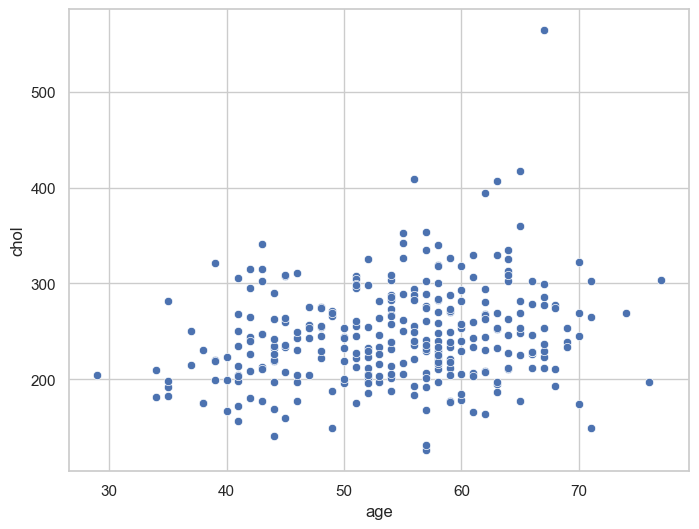

In [203]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(x="age", y="chol", data=df)
plt.show()

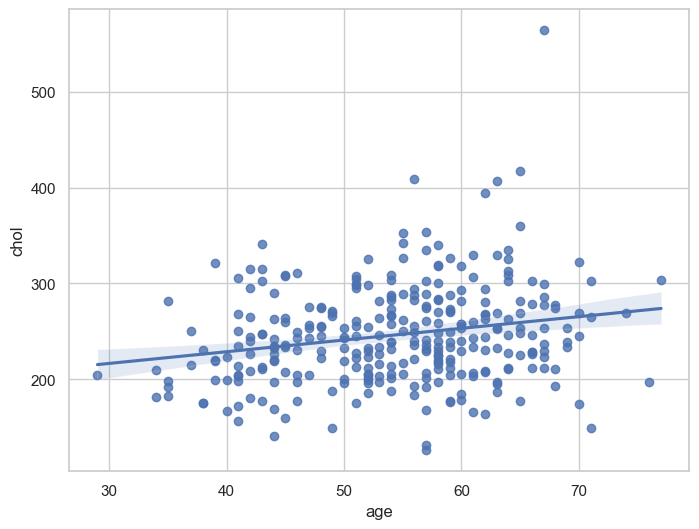

In [205]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="age", y="chol", data=df)
plt.show()

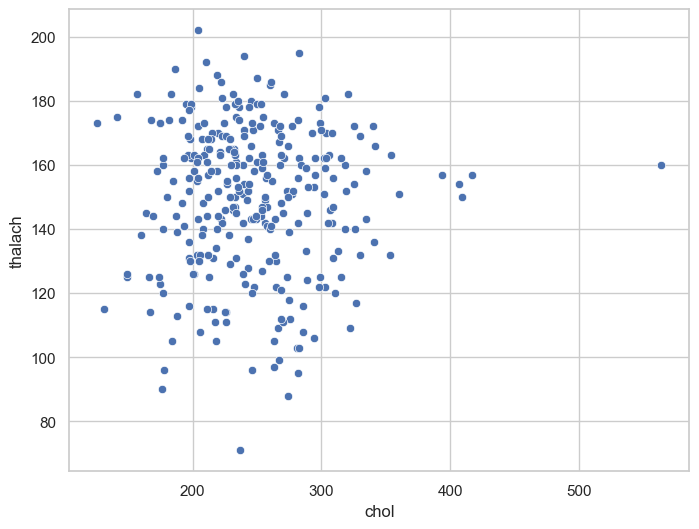

In [207]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(x="chol", y = "thalach", data=df)
plt.show()

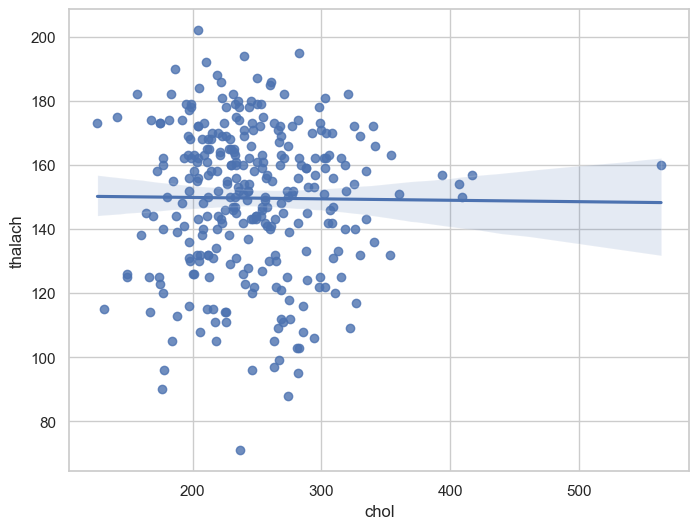

In [209]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="chol", y="thalach", data=df)
plt.show()

## 10. Dealing with missing values 

-	In Pandas missing data is represented by two values:

  -	**None**: None is a Python singleton object that is often used for missing data in Python code.
  
  -	**NaN** : NaN (an acronym for Not a Number), is a special floating-point value recognized by all systems that use the standard IEEE floating-point representation.


-  There are different methods in place on how to detect missing values.


### Pandas isnull() and notnull() functions <a class="anchor" id="10.1"></a>


- Pandas offers two functions to test for missing data - `isnull()` and `notnull()`. These are simple functions that return a boolean value indicating whether the passed in argument value is in fact missing data.

-  Below, I will list some useful commands to deal with missing values.


### Useful commands to detect missing values <a class="anchor" id="10.2"></a>

-	**df.isnull()**

The above command checks whether each cell in a dataframe contains missing values or not. If the cell contains missing value, it returns True otherwise it returns False.


-	**df.isnull().sum()**

The above command returns total number of missing values in each column in the dataframe.


-	**df.isnull().sum().sum()** 

It returns total number of missing values in the dataframe.


-	**df.isnull().mean()**

It returns percentage of missing values in each column in the dataframe.


-	**df.isnull().any()**

It checks which column has null values and which has not. The columns which has null values returns TRUE and FALSE otherwise.

-	**df.isnull().any().any()**

It returns a boolean value indicating whether the dataframe has missing values or not. If dataframe contains missing values it returns TRUE and FALSE otherwise.


-	**df.isnull().values.any()**

It checks whether a particular column has missing values or not. If the column contains missing values, then it returns TRUE otherwise FALSE.


-	**df.isnull().values.sum()**


It returns the total number of missing values in the dataframe.



In [211]:
# check for missing values

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Check with ASSERT statement 


[Back to Table of Contents](#0.1)


- We must confirm that our dataset has no missing values. 

- We can write an **assert statement** to verify this. 

- We can use an assert statement to programmatically check that no missing, unexpected 0 or negative values are present. 

- This gives us confidence that our code is running properly.

- **Assert statement** will return nothing if the value being tested is true and will throw an AssertionError if the value is false.

- **Asserts**

  - assert 1 == 1 (return Nothing if the value is True)

  - assert 1 == 2 (return AssertionError if the value is False)

In [215]:
#assert that there are no missing values in the dataframe

assert pd.notnull(df).all().all()


In [217]:
#assert all values are greater than or equal to 0

assert (df >= 0).all().all()


## Outlier detection 

In [220]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

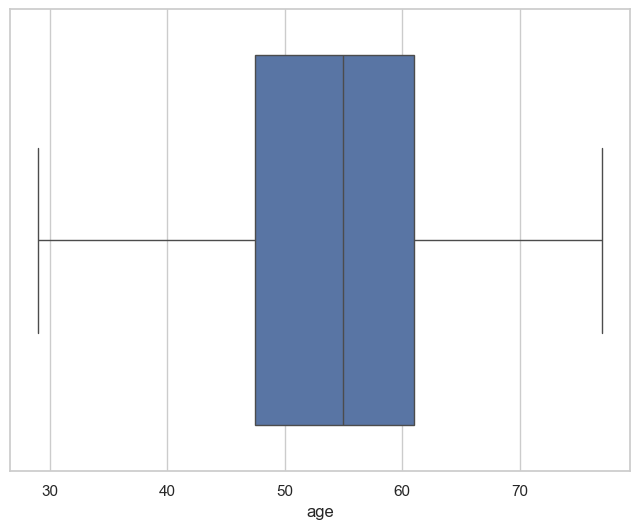

In [222]:
# #### Box-plot of `age` variable
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["age"])
plt.show()

In [224]:
df['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

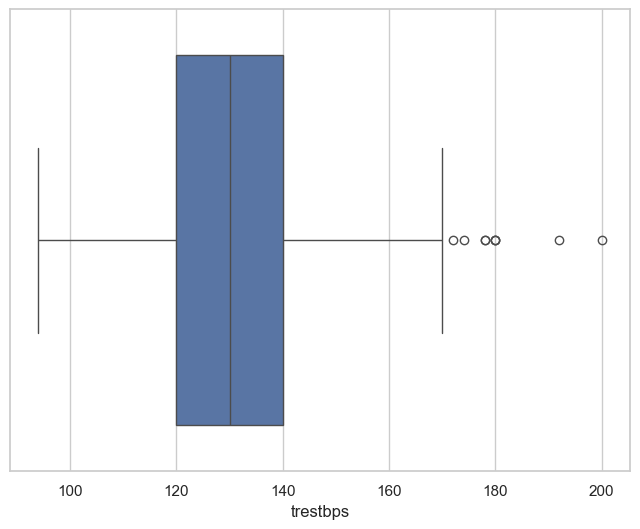

In [226]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["trestbps"])
plt.show()


In [228]:
df['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

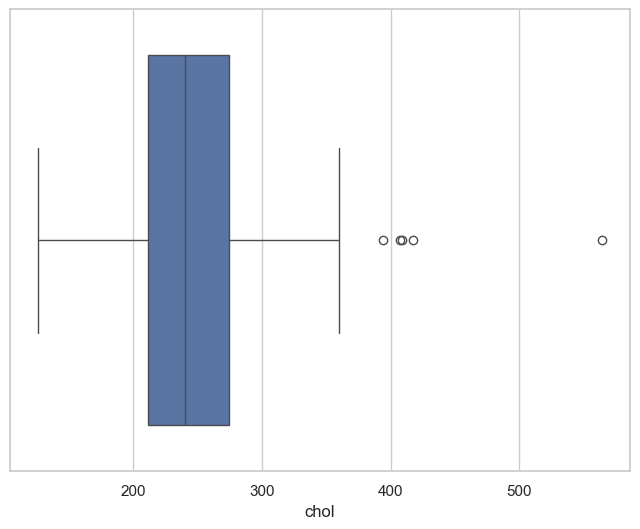

In [230]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["chol"])
plt.show()


In [232]:
df['thalach'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

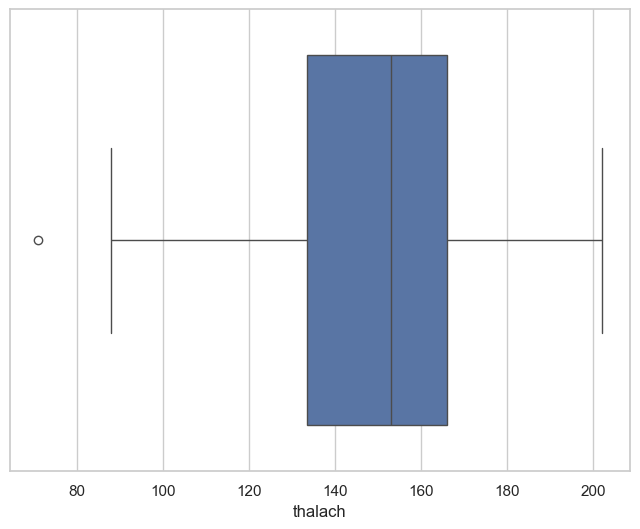

In [234]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["thalach"])
plt.show()

In [236]:
df['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

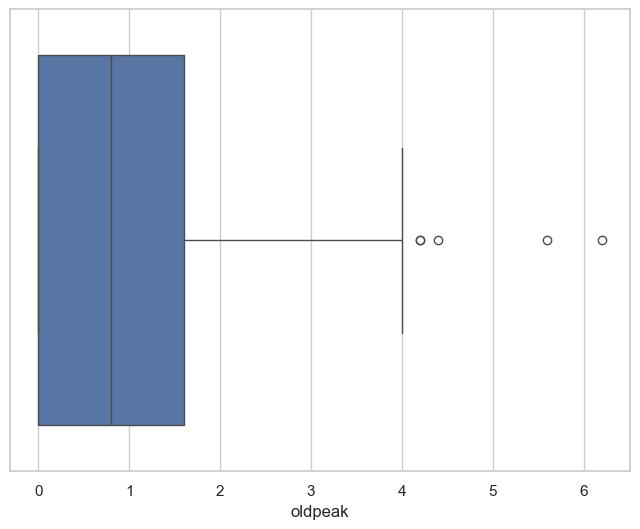

In [238]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["oldpeak"])
plt.show()
